In [40]:

import random
import math 
import numpy as np

    
depart = 0;
break1=0;
T = 100; # the total time we want to analyze
Ts = np.zeros(T*T); 
i = 1;
lam = 20;
t = 0
rate=0;

# for j in range(0,4000):
while (t<T):
    u1 = np.random.rand()
    t = t - np.log(u1)/lam
    u2 = np.random.rand()    
    if (np.mod(t,10)<5):
        rate = 4 + 3*np.mod(t,10);

    else:
        rate = 19 - 3*(np.mod(t,10)-5);
    if u2 < (rate/lam):
        Ts[i+1] = t    
        i = i + 1
    
p=0;
no_zero_TS = Ts[Ts!=0]

while(depart < T):
    number_arrive = (len(no_zero_TS[(no_zero_TS < depart)]))
    if(p == number_arrive):
        break_time = 0.3*random.uniform(0, 1)
        break1 =break1+ break_time 
        depart =depart+ break_time
    elif(p < number_arrive and depart < T):
        while(p < number_arrive and depart < T):
            depart =depart+ np.random.exponential(1/25)
            p += 1

print(break1)
        


56.014289426676584


ValueError: could not broadcast input array from shape (400) into shape (200)

In [44]:
np.linspace(0.1, 1, num=10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

[0.0, 0.010101010101010102, 0.02356902356902357, 0.05303030303030303, 0.19797979797979798, 0.335016835016835, 0.3997113997113997, 0.9318181818181818, 1.7115600448933783]
[0.0, 0.015151515151515152, 0.05387205387205387, 0.1893939393939394, 2.111111111111111, 3.6094276094276094, 4.865800865800866, 7.973484848484849, 10.241301907968575]


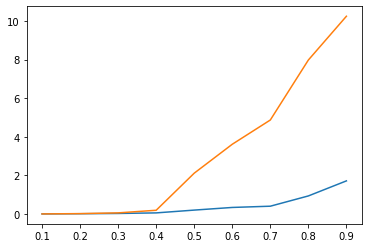

In [48]:
import numpy as np
import matplotlib.pyplot as plt

ri = 0.75;
rj = 0.25;
buff1 = [];
buff2 = [];
efficy=[];
packet=[];
time_slot=1000;
mean_buff1=[];
mean_buff2=[];

p_value = np.linspace(0.1, 0.9, num=9) #p=pi
for p in (p_value):
    input1 = 0;
    input2 = 0;
    for t in range(1,100):
        if (np.random.rand()<p): #input port 1 in this time slot is passed
            input1=input1+1;
        if (np.random.rand()<p): #input port 2 in this time slot is passed
            input2=input2+1;
        if (input1) != 0 and (input2) != 0:
            if np.random.rand() < ri:
                input1 =  input1-1;
            if np.random.rand() < rj:
                input2 = input2-1;
        elif input1 != 0 and input2 == 0:
            input1 = input1 - 1
        elif input1 == 0 and input2 != 0:
            input2 = input2 - 1
        buff1.append(input1);
        buff2.append(input2); 
    mean_buff1.append(np.mean(buff1))
    mean_buff2.append(np.mean(buff2))
print(mean_buff1)
print(mean_buff2)
#     efficy.append(1-(np.mean(input1)+np.mean(input2))/2);




# print(buff2)
plt.plot(p_value,mean_buff1)
plt.plot(p_value,mean_buff2)
plt.show()


The  2.5 % percentile is:  0.6958041958041958
The  2.5 % percentile is:  0.7170171098742528


(array([   0., 1640., 7167.,  994.,    0.]),
 array([-1.5, -0.5,  0.5,  1.5,  2.5,  3.5]),
 <a list of 5 Patch objects>)

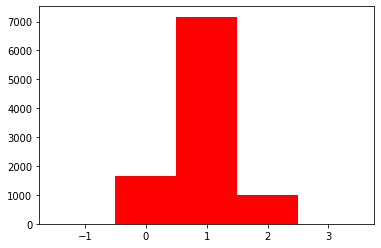

In [12]:
import numpy as np
import matplotlib.pyplot as plt

ri = 0.75;
rj = 0.25;
buff1 = [];
buff2 = [];
efficy=[];
packet=[];
time_slot=1000;
mean_buff1=[];
mean_buff2=[];
number_processed=[];
efficy2=[];
p_value = np.linspace(0.1, 0.9, num=9) #p=pi
p=0.5;
for oo in range(1,100):
    input1 = 0;
    input2 = 0;
    for t in range(1,100):
        if (np.random.rand()<p): #input port 1 in this time slot is passed
            input1=input1+1;
        if (np.random.rand()<p): #input port 2 in this time slot is passed
            input2=input2+1;            
        deter=0
        if (input1) != 0 and (input2) != 0:
            if np.random.rand() < ri:
                deter=deter+1;
                input1 =  input1-1;
            if np.random.rand() < rj:
                deter=deter+1;
                input2 = input2-1;
        elif input1 != 0 and input2 == 0:
            deter=deter+1;
            input1 = input1 - 1
        elif input1 == 0 and input2 != 0:
            deter=deter+1;
            input2 = input2 - 1
        number_processed.append(deter);
        buff1.append(input1);
        buff2.append(input2); 
    meanss=(np.mean(buff1)+np.mean(buff2));
#     print(meanss)
    efficy2.append((5-meanss)/2);
#     efficy.append(1-(np.mean(input1)+np.mean(input2))/2);
np.sort(efficy2)
a=95
print('The ',str((100-a)/2),'% percentile is: ',str(efficy2[25]))
print('The ',str((100-a)/2),'% percentile is: ',str(efficy2[97]))

bin1 = np.arange(-1,5)-0.5;
plt.hist(number_processed,bin1,color='r')

In [1]:
import numpy as np
from scipy.special import comb

userinput = input()
userinput = int(userinput)

# input1 = np.array([0, 0, 0, 1, 0, 0, 0]) # initial distribution
N=userinput;
N = 100 # number of individuals
input1 =np.zeros(2*N+1)
input1[N]=1
# transition matrix
P = np.zeros((2*N+1, 2*N+1))
for i in range(0,2*N+1):
    for j in range(0,2*N+1):
        P[i,j] = comb(2*N,j, exact=True, repetition=False)*(((i)/(2*N))**(j))*((1-(i)/(2*N))**(2*N-j))

n = 200 # number of steps to take
output = np.zeros((n+1,2*N+1)) # clear out any old values
t = np.arange(0,n)
output[0,:] = input1  #generate first output value 
for i in range(1,n):
    output[i,:] = np.dot(output[i-1,:],P)
    comparasion = abs(output[i,:]-output[i-1,:])
    if comparasion[i]==1:
        print('Convergence after '+str(i),' iterations')
    if i==n-1:
        print('Not Convergence ')
        break 

 120


Not Convergence 


In [3]:
print(output)

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [3.87259191e-121 1.54903677e-118 3.09032835e-116 ... 3.09032835e-116
  1.54903677e-118 3.87259191e-121]
 [8.10677847e-073 9.04110231e-071 5.08677583e-069 ... 5.08677583e-069
  9.04110231e-071 8.10677847e-073]
 ...
 [2.85870518e-001 8.74900001e-004 9.80959723e-004 ... 9.80959723e-004
  8.74900001e-004 2.85870518e-001]
 [2.86402910e-001 8.72785152e-004 9.78587749e-004 ... 9.78587749e-004
  8.72785152e-004 2.86402910e-001]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


 50


NameError: name 'a' is not defined

In [2]:
userinput = input()
userinput = int(userinput)
print((userinput))

 50


50
